# Garmin Stairs Report

In [1]:
import tcxtools
from helper import overlay_graph, mean_graph, overlay_hist, overlay_timeseries, get_sec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# TCX and CSV files name without extension

In [2]:
filename = 'activity_5272936472'

# Reading .TCX file

In [4]:
tcx_data = tcxtools.TCXPandas('./stair/' + filename + '.tcx')
tracks, laps = tcx_data.parse()
tracks = tracks.set_index('time')

# Reading .CSV file

In [7]:
csv_data = pd.read_csv('./stair/' + filename + '.csv')

# Calculating time in seconds
csv_data['Time (s)'] = csv_data['Time'].apply(get_sec)

# Calculating Power in watts
csv_data['Power (w)'] = csv_data['Calories'] * 4184 / csv_data['Time (s)']

# Calculating Energy in kilojoules per second
csv_data['Energy (kj)'] = (csv_data['Power (w)'] * csv_data['Time (s)']) / 1000

csv_data

,Laps,Time,Cumulative Time,Distance,Avg Speed,Avg HR,Max HR,Calories,Moving Time,Time (s),Power (w),Energy (kj)
0,1,56:10,56:10,0,0,152,183,522,0,3370,648.08546,2184.048
1,Summary,56:10,56:10,0,0,152,183,522,0,3370,648.08546,2184.048


In [8]:
csv = csv_data.head(-1)
csv_summary = csv_data.tail(1)

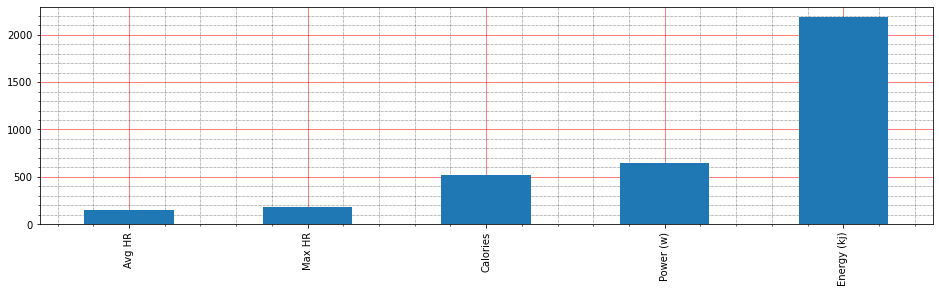

In [10]:
mean_graph(csv[['Avg HR', 'Max HR', 'Calories', 'Power (w)', 'Energy (kj)']])

In [21]:
tracks

,distance,hr
time,,
2020-07-21 21:52:57+00:00,0.0,126
2020-07-21 21:52:59+00:00,0.0,130
2020-07-21 21:53:00+00:00,0.0,132
2020-07-21 21:53:01+00:00,0.0,133
2020-07-21 21:53:02+00:00,0.0,136
...,...,...
2020-07-21 22:49:07+00:00,0.0,168
2020-07-21 22:49:08+00:00,0.0,169
2020-07-21 22:49:09+00:00,0.0,170


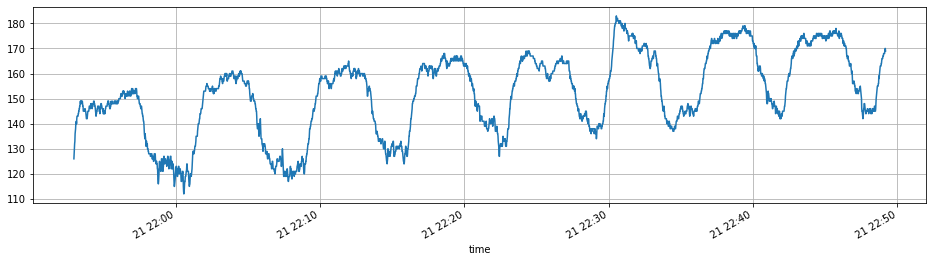

In [22]:
graph = tracks['hr']
graph.astype(float).plot(figsize=(16,4))
plt.grid()

# Power (watts)

In [12]:
csv['Power (w)'].describe()

count      1.00000
mean     648.08546
std            NaN
min      648.08546
25%      648.08546
50%      648.08546
75%      648.08546
max      648.08546
Name: Power (w), dtype: float64

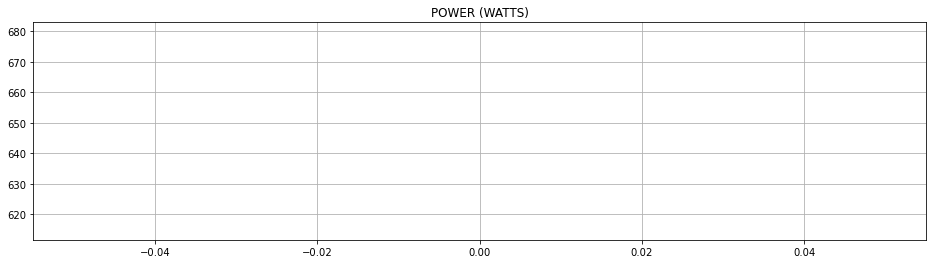

In [20]:
graph = laps['power (w)']
graph.astype(float).plot(figsize=(16,4))
plt.title('POWER (WATTS)')
plt.grid()

# Energy (kj)

In [14]:
csv['Energy (kj)'].describe()

count       1.000
mean     2184.048
std           NaN
min      2184.048
25%      2184.048
50%      2184.048
75%      2184.048
max      2184.048
Name: Energy (kj), dtype: float64